In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],
      'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]}

In [20]:
DF=pd.DataFrame(d)
DF

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no
...,...,...
96,67,yes
97,74,yes
98,79,yes
99,90,yes


In [21]:
DF.head()

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no


In [18]:
DF.tail()

,miles_per_week,completed_50m_ultra
96,67,1.0
97,74,1.0
98,79,1.0
99,90,1.0
100,112,1.0


In [17]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   miles_per_week       101 non-null    int64  
 1   completed_50m_ultra  101 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [22]:
from sklearn.preprocessing import OrdinalEncoder
order=['no','yes']
enc=OrdinalEncoder(categories=[order])
DF['completed_50m_ultra']=enc.fit_transform(DF[['completed_50m_ultra']])
DF

,miles_per_week,completed_50m_ultra
0,37,0.0
1,39,0.0
2,46,0.0
3,51,0.0
4,88,0.0
...,...,...
96,67,1.0
97,74,1.0
98,79,1.0
99,90,1.0


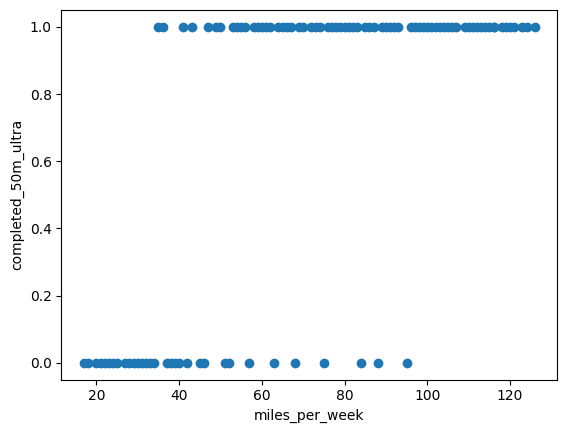

In [25]:
plt.scatter(DF['miles_per_week'],DF['completed_50m_ultra'])
plt.xlabel('miles_per_week')
plt.ylabel('completed_50m_ultra')
plt.show()


<Axes: xlabel='completed_50m_ultra', ylabel='count'>

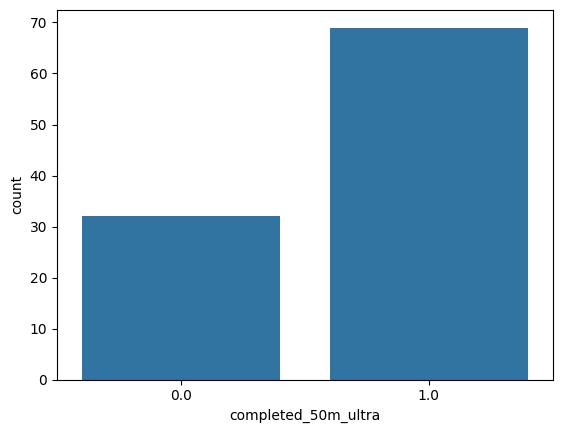

In [28]:
sns.countplot(x='completed_50m_ultra', data=DF)

Feature & Target Seperation


In [33]:
X=DF.iloc[:,0:1]
y=DF.iloc[:,1]

Spliting Data

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=3654)
print(X_train.shape,X_test.shape)


(80, 1) (21, 1)


In [43]:
from sklearn.linear_model import LogisticRegression

Logistic_R=LogisticRegression()

Logistic_R.fit(X_train,y_train)



LogisticRegression()

In [44]:
y_pred=Logistic_R.predict(X_test)

In [45]:
Logistic_R.score(X_test,y_test)

0.9047619047619048

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         6
         1.0       1.00      0.87      0.93        15

    accuracy                           0.90        21
   macro avg       0.88      0.93      0.89        21
weighted avg       0.93      0.90      0.91        21

